In [96]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from plotnine import *
import matplotlib.pyplot as plt
import numpy as np

In [97]:
runners_on = pd.read_csv('2022 Runners.csv')
runners_off = pd.read_csv('2022 No Runners.csv')

newdata = pd.merge(runners_off, runners_on, on='player_name', suffixes=('_x','_y'))
newdata['xwobadifference'] = newdata['xwoba_x'] - newdata['xwoba_y']


# Only using pitchers with more than 500 pitches

In [98]:
filtered_data = newdata[(newdata['total_pitches_x'] > 500) & (newdata['total_pitches_y'] > 500)]
X = filtered_data[['total_pitches_x', 'total_pitches_y']]
y = filtered_data['xwobadifference']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [99]:
new_pitches_x = [600, 550, 700]
new_pitches_y = [500, 600, 450]
new_data = pd.DataFrame({'total_pitches_x': new_pitches_x, 'total_pitches_y': new_pitches_y})
predictions = model.predict(new_data)

In [100]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
for i in range(len(predictions)):
    print("Prediction", i+1, ":", predictions[i])
print("Root Mean Squared Error (RMSE):", rmse)

Prediction 1 : -0.012359999999999987
Prediction 2 : -0.015499999999999958
Prediction 3 : -0.01086999999999999
Root Mean Squared Error (RMSE): 0.031220845290369083


#### Predicting pitchers to do worse with runners on the more pitches they've thrown (regular SP's)

# List of top pitcher's 
(Pitcher's who do way better with runners on compared to runners off)

In [101]:
sorted_data = filtered_data.sort_values(by='xwobadifference', ascending=False)
top_pitchers = sorted_data.head(10)['player_name']
print("Top 10 pitchers based on xwobadifference:")
for pitcher in top_pitchers:
    print(pitcher)

Top 10 pitchers based on xwobadifference:
Kaprielian, James
Urías, Julio
Otto, Glenn
Espino, Paolo
Garcia, Luis
Anderson, Tyler
Flexen, Chris
Smyly, Drew
Márquez, Germán
Keller, Mitch


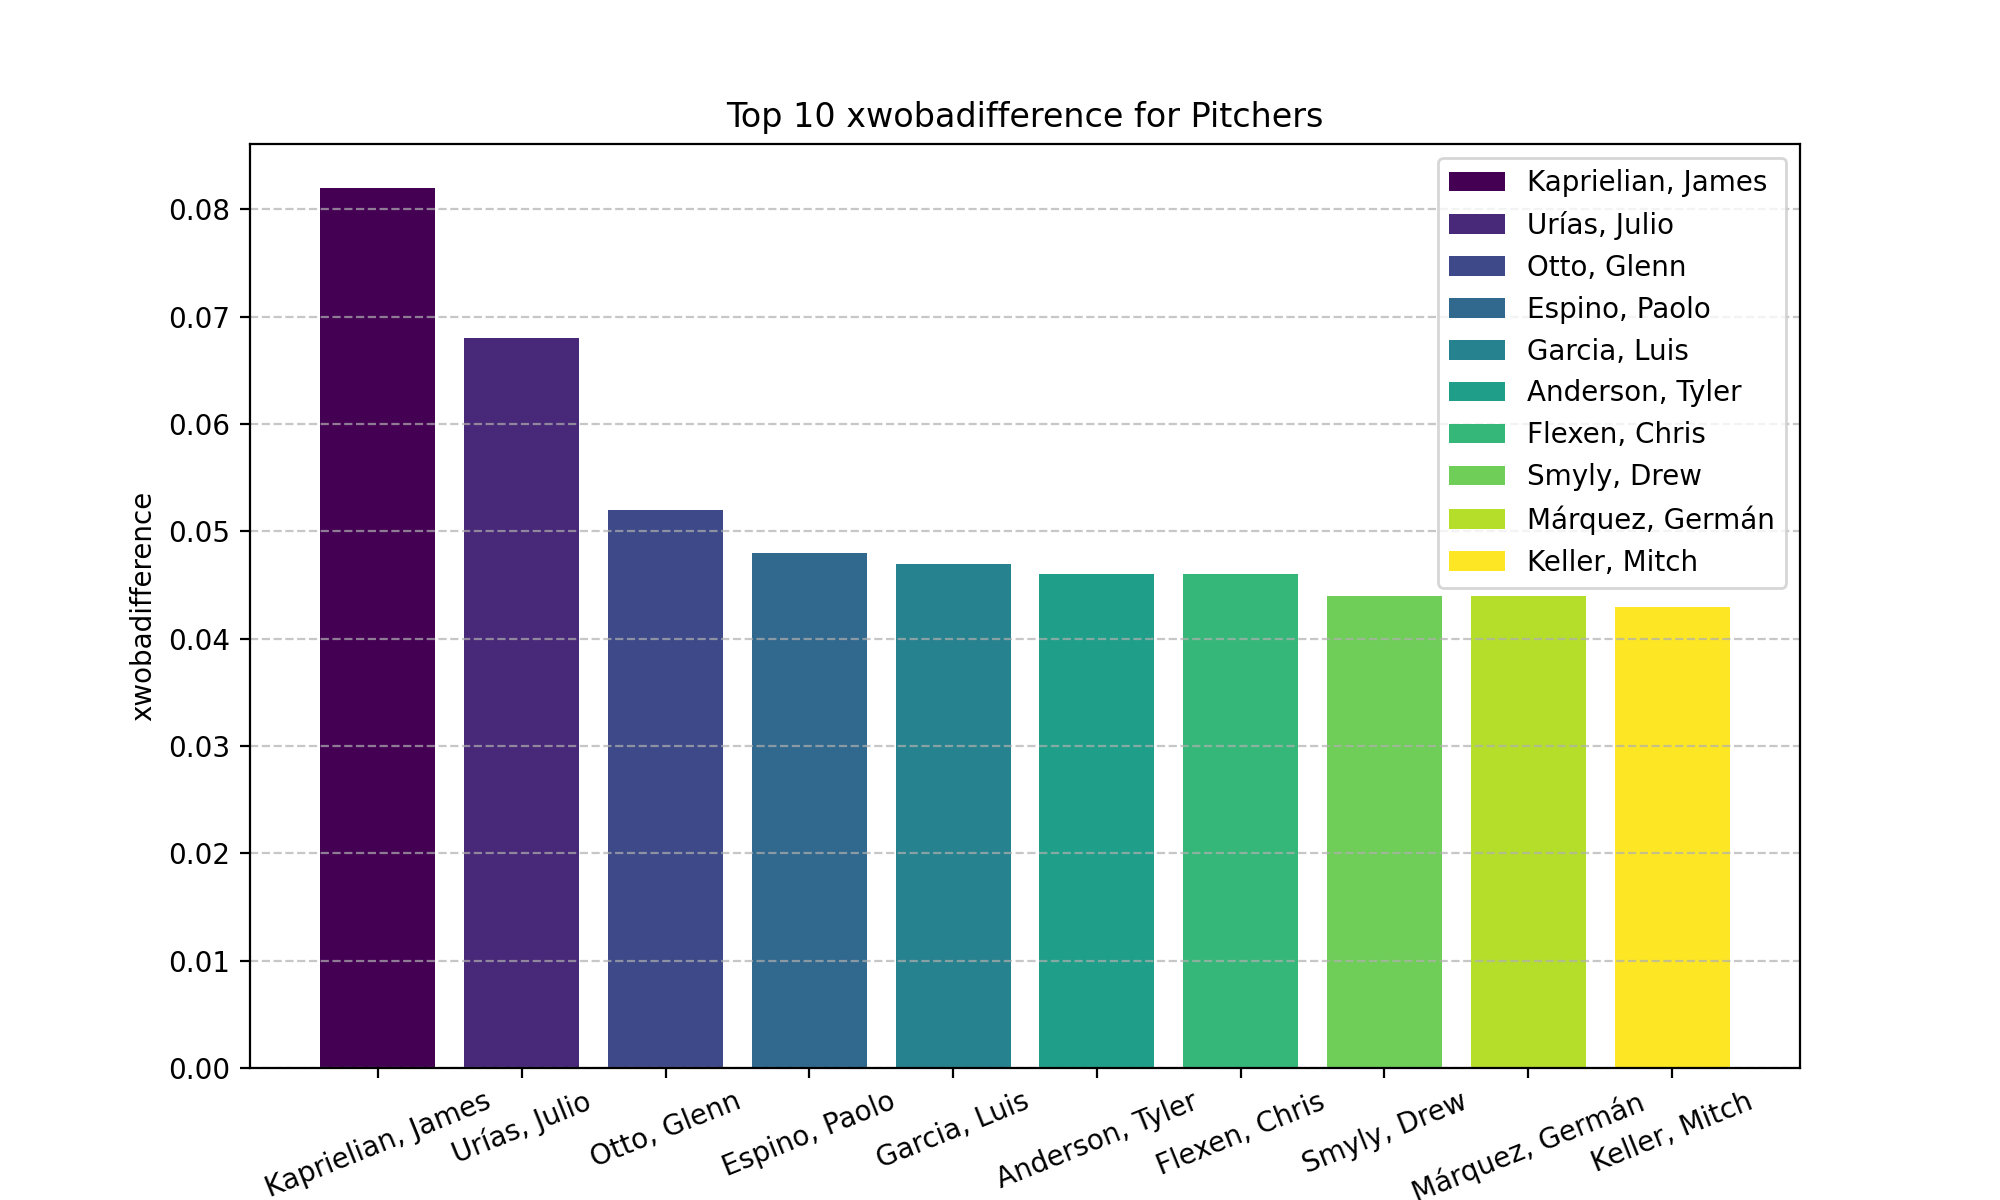

In [102]:
top_pitchers = sorted_data.head(10)

cmap = plt.colormaps['viridis']
colors = cmap(np.linspace(0, 1, len(top_pitchers)))

plt.figure(figsize=(10, 6))
bars = plt.bar(top_pitchers['player_name'], top_pitchers['xwobadifference'], color=colors)
plt.title('Top 10 xwobadifference for Pitchers')
plt.xlabel('Pitcher Name')
plt.ylabel('xwobadifference')
plt.xticks(rotation=22)
plt.grid(axis='y', linestyle='--', alpha=0.7)

legend_labels = top_pitchers['player_name']
plt.legend(bars, legend_labels, loc='upper right')

plt.show()

# List of worst pitcher's
(Pitcher's who do way better with no runners on)

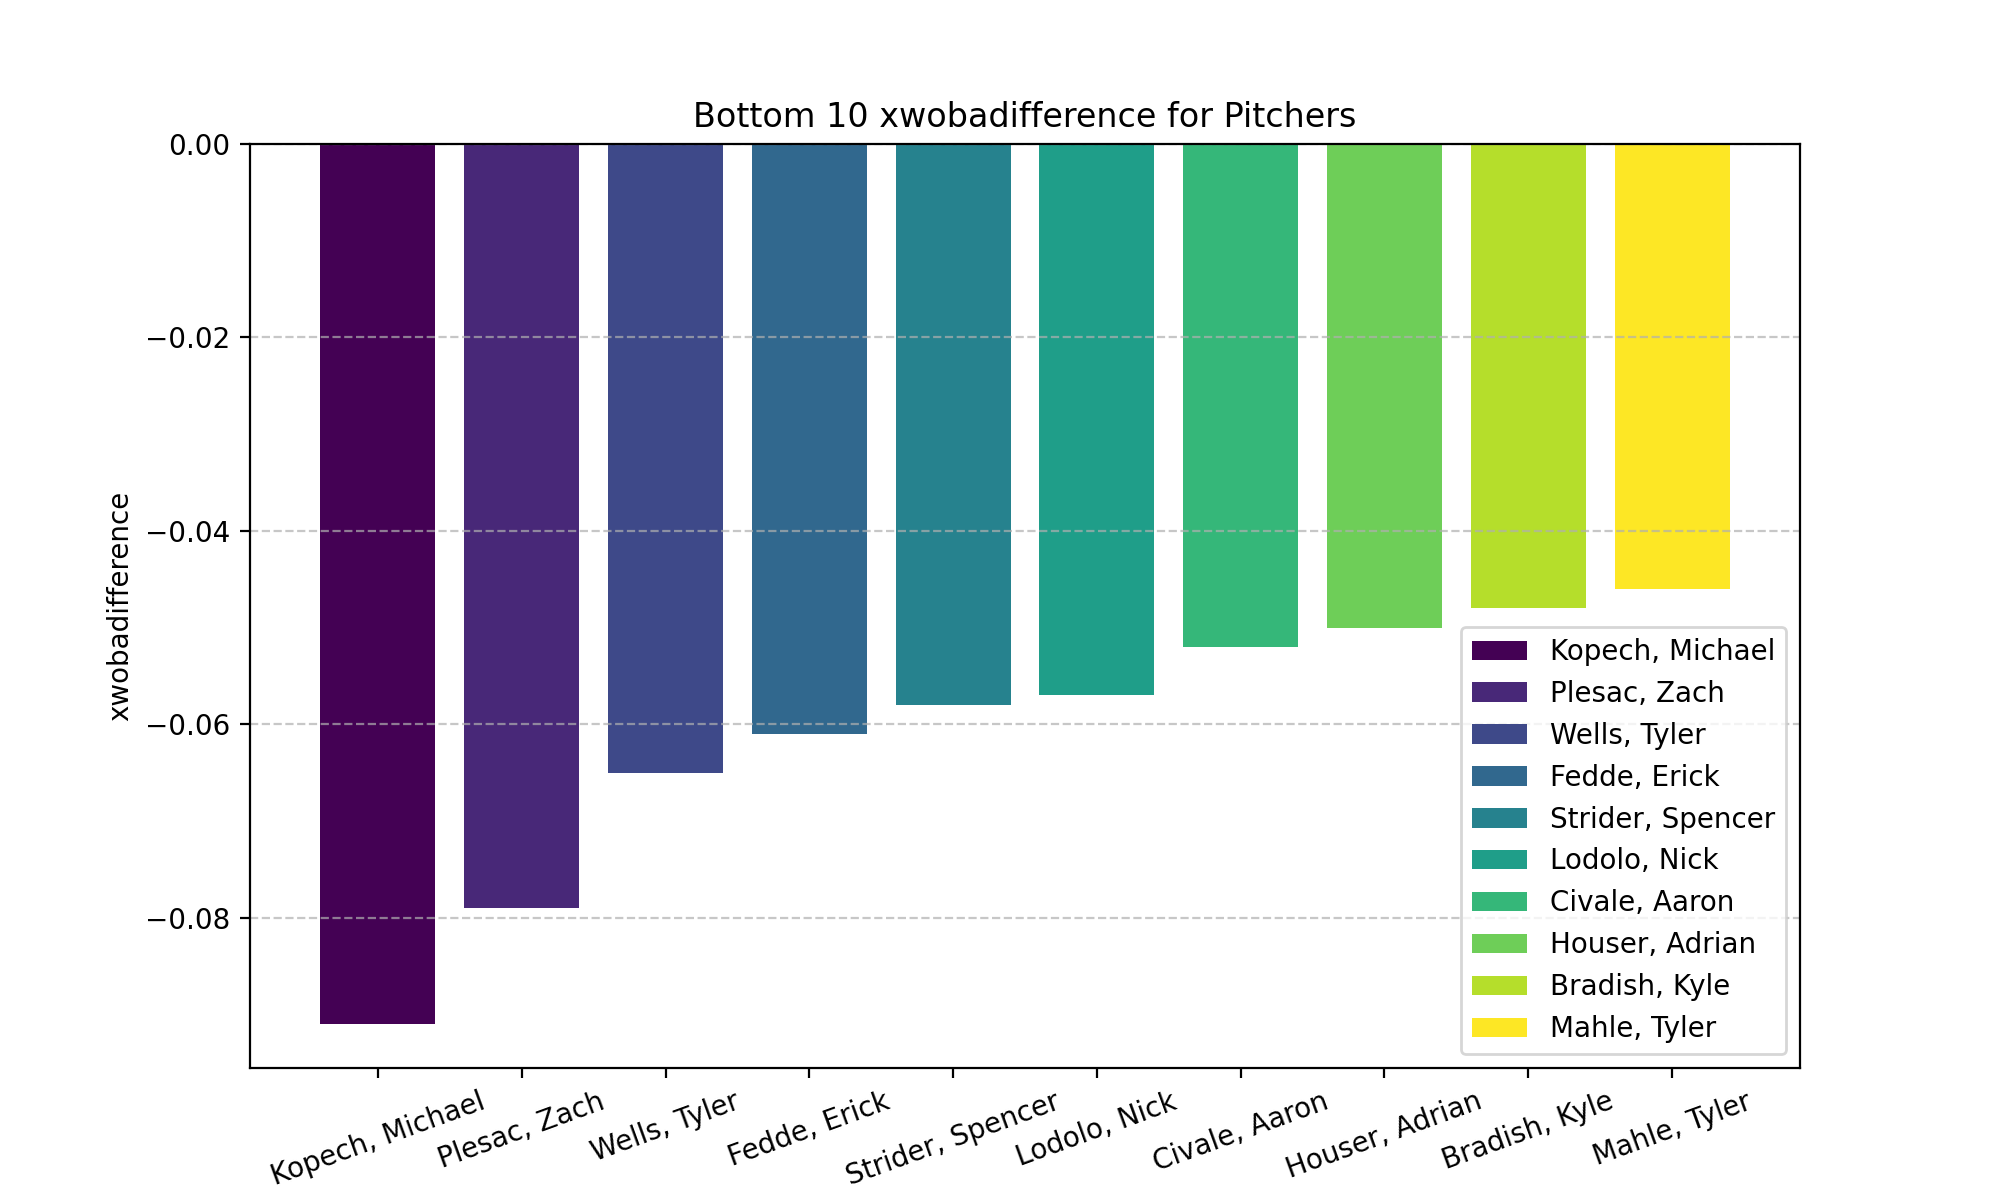

In [103]:
worst_pitchers = sorted_data.sort_values('xwobadifference').head(10)

cmap = plt.colormaps['viridis']
colors = cmap(np.linspace(0, 1, len(worst_pitchers)))

plt.figure(figsize=(10, 6))
bars = plt.bar(worst_pitchers['player_name'], worst_pitchers['xwobadifference'], color=colors)
plt.title('Bottom 10 xwobadifference for Pitchers')
plt.xlabel('Pitcher Name')
plt.ylabel('xwobadifference')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

legend_labels = worst_pitchers['player_name']
plt.legend(bars, legend_labels, loc='lower right')

plt.show()